In [1]:
import pandas as pd
import math
from keras import models
from keras import layers
from keras import regularizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving vyborki.xlsx to vyborki.xlsx


In [3]:
df = pd.read_excel('vyborki.xlsx')
df.head()

# fill empty values ​​with the last number
df=df.fillna(222)
df = df.replace(222,np.nan).ffill()

# average for each hour
df.iloc[97:1009, :] = df.iloc[97:1009, :].rolling(13).mean().reindex(df.index[::13])

# average for every two hours
df.iloc[1009:1512, :] = df.iloc[1009:1512, :].rolling(25).mean().reindex(df.index[::25])
df = pd.concat([df[x].dropna().reset_index(drop=True) for x in df], axis=1)

In [4]:
# day
fet = df['d']
dataset = fet.values
met=dataset[:]

data = []
data.append(met[:])

date = np.array(data)

In [5]:
# train data
x_train = np.array(df.iloc[0:97, 0:45]).transpose()
y_train = np.array(df.iloc[92:, 0:45]).transpose()
# test data
x_test= np.array(df.iloc[0:97, 45:60]).transpose()
y_test = np.array(df.iloc[92:, 45:60]).transpose()

In [6]:
np.random.seed(42)
train_data = x_train
train_targets = y_train

In [7]:
# ANN model
def build_model(optimizer='adam'):
  tf.random.set_seed(42)
  model = models.Sequential()
  model.add(layers.Dense(128, activation='relu',  input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(Dropout(0.1))
  model.add(layers.Dense(93, activation='linear'))
  model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
  return model

In [8]:
# model training
model3=build_model(tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False))
history3 = model3.fit(x_train, y_train, epochs=657, validation_data=(x_test, y_test),batch_size=1, verbose=2)

Epoch 1/657
45/45 - 1s - loss: 0.0013 - mae: 0.0218 - val_loss: 5.9150e-04 - val_mae: 0.0144 - 884ms/epoch - 20ms/step
Epoch 2/657
45/45 - 0s - loss: 7.1545e-04 - mae: 0.0155 - val_loss: 3.2773e-04 - val_mae: 0.0127 - 105ms/epoch - 2ms/step
Epoch 3/657
45/45 - 0s - loss: 5.4574e-04 - mae: 0.0146 - val_loss: 4.4370e-04 - val_mae: 0.0131 - 113ms/epoch - 3ms/step
Epoch 4/657
45/45 - 0s - loss: 5.6491e-04 - mae: 0.0136 - val_loss: 2.9963e-04 - val_mae: 0.0112 - 124ms/epoch - 3ms/step
Epoch 5/657
45/45 - 0s - loss: 5.1238e-04 - mae: 0.0129 - val_loss: 6.3373e-04 - val_mae: 0.0148 - 115ms/epoch - 3ms/step
Epoch 6/657
45/45 - 0s - loss: 5.9892e-04 - mae: 0.0126 - val_loss: 3.5376e-04 - val_mae: 0.0121 - 111ms/epoch - 2ms/step
Epoch 7/657
45/45 - 0s - loss: 4.1866e-04 - mae: 0.0116 - val_loss: 2.9132e-04 - val_mae: 0.0109 - 135ms/epoch - 3ms/step
Epoch 8/657
45/45 - 0s - loss: 3.6019e-04 - mae: 0.0102 - val_loss: 2.9275e-04 - val_mae: 0.0120 - 115ms/epoch - 3ms/step
Epoch 9/657
45/45 - 0s - lo

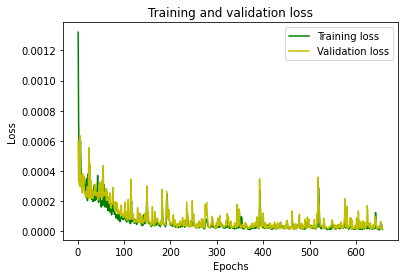

In [40]:
# change mse by epoch
plt.clf()
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

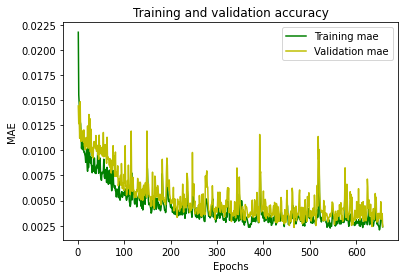

In [41]:
# change mae by epoch
plt.clf()
acc = history3.history['mae']
val_acc = history3.history['val_mae']
plt.plot(epochs, acc, 'g', label='Training mae')
plt.plot(epochs, val_acc, 'y', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

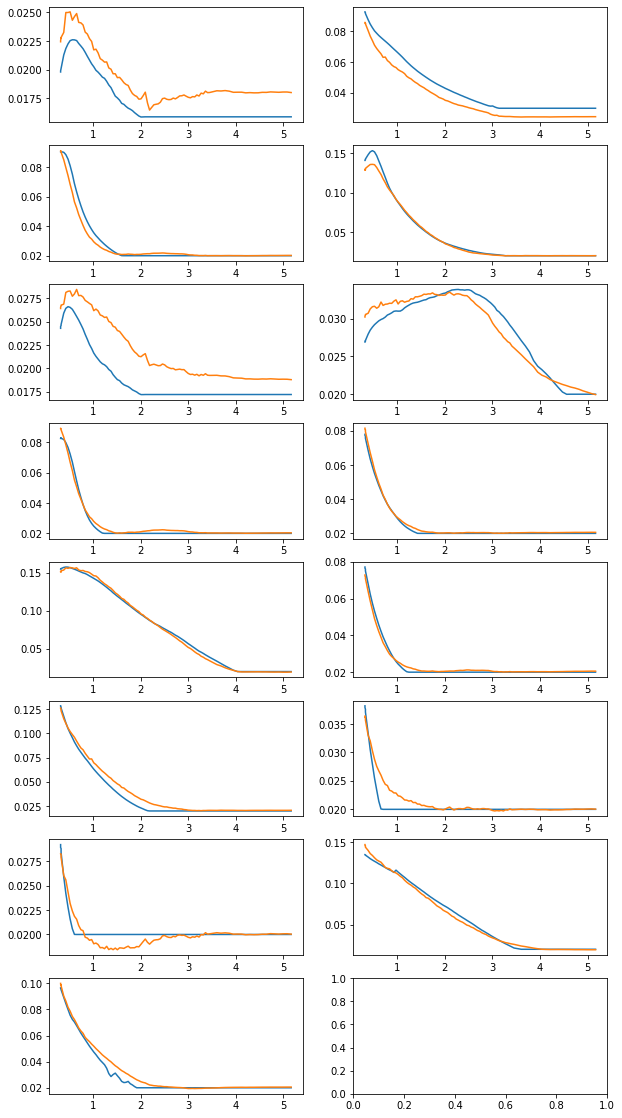

In [11]:
# blue = real voltage, orange - predicted voltage
pred = model3(x_test)
t = pred
t1 = y_test
fig, ax = plt.subplots(8, 2, figsize=(10, 20))
axs = [ax[i, j] for i in range(8) for j in range(2)]
for i in range(0, 15):
    axs[i].plot(date[0, 92:], t1[i])
    axs[i].plot(date[0, 92:], t[i])

In [12]:
# mean absolute error (mae) for test data
mae_er = []
for i in range(0, 15):
  mae_er.append(mean_absolute_error(t1[i], t[i]))

In [13]:
# mean absolute error (mae) for test data
mae_er

[0.001876580392910079,
 0.007071105706829704,
 0.002343923947888035,
 0.0026306161551533634,
 0.003036966557190622,
 0.0013165691036291067,
 0.0016360904416187893,
 0.0008876595175098642,
 0.002384379863768263,
 0.0012140588074750042,
 0.004202559292942637,
 0.0008989367154607805,
 0.0006200012310415111,
 0.0035296703089703193,
 0.0025283607712084945]

In [14]:
# mean mae
np.mean(mae_er)

0.002411831920906438

In [15]:
# max absolute error (max)
max_er = []
for i in range(0, 15):
  max_er.append(max_error(t1[i], t[i]))

In [16]:
# max absolute error (max)
max_er

[0.0031308107770406345,
 0.01167191446561075,
 0.012565574519450826,
 0.017349524171535707,
 0.00537204372607741,
 0.0034434539914131174,
 0.006592163538932799,
 0.003949035993906183,
 0.005324733461783242,
 0.004329462361335759,
 0.010327161115866575,
 0.005936521198657823,
 0.0018548518116657288,
 0.012201998329162606,
 0.011238438266974255]

In [17]:
# mean max
np.mean(max_er)

0.007685845848627562

In [18]:
# mean absolute percentage error (mape)
S = 0
mape_er = []
for j in range(0, y_test.shape[0]):
  for i in range(0, y_test.shape[1]):
    S += abs(y_test[j, i]-pred[j, i])/abs(pred[j, i])
  mape_er.append(S/y_test.shape[1])
  S = 0

In [19]:
# mape
mape_er

[<tf.Tensor: shape=(), dtype=float32, numpy=0.09713162>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.19089016>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.06779209>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.03485158>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.1356127>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.04497433>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.05222507>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.028340973>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.037879385>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.039726663>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.10718833>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.036573652>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.031065164>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.057295706>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.071886934>]

In [42]:
# mean mape
np.mean(mape_er)

0.06889562

In [22]:
# simpson's method for integrating amperage
def Q_Simpson(x, f):
  Q=[]
  SUM_Q = 0
  for i in range(2, f.shape[0]):
    SUM_Q+=(x[i]-x[i-2])*(f[i-2]+4*f[i-1]+f[i])/6
    Q.append(SUM_Q)
  return Q

In [23]:
# minutes
fet = df['min']
dataset = fet.values
met=dataset[:]

minut = []
minut.append(met[:])

minut = np.array(minut)

In [24]:
# seconds
second = minut*60

In [25]:
# charge received at predicted voltage
Q_pred = np.array([Q_Simpson(second[0], np.concatenate([x_test[i], t[i][5:]])/100) for i in range(0, 15)])

# charge received at real voltage
Q_real = np.array([Q_Simpson(second[0], np.concatenate([x_test[i], t1[i][5:]])/100) for i in range(0, 15)])

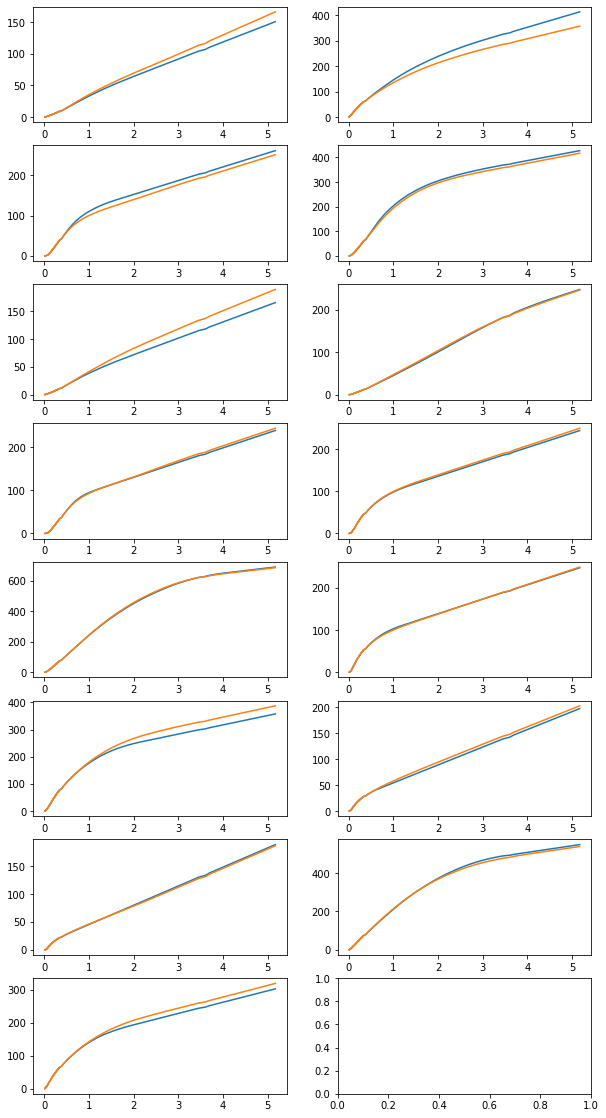

In [26]:
# blue = real charge, orange - predicted charge
fig, ax = plt.subplots(8, 2, figsize=(10, 20))
axs = [ax[i, j] for i in range(8) for j in range(2)]
for i in range(0, 15):
    axs[i].plot(date[0, 2:], Q_real[i])
    axs[i].plot(date[0, 2:], Q_pred[i])

In [27]:
# mean absolute error (mae)
TEST_MAE_ERROR = []
for i in range(0, 15):
  TEST_MAE_ERROR.append(mean_absolute_error(Q_real[i, x_train.shape[1]:], Q_pred[i, x_train.shape[1]:]))

In [28]:
# mae
TEST_MAE_ERROR 

[6.616452531913589,
 28.985232411202894,
 10.564353728684056,
 9.265091402473601,
 12.612597155010594,
 2.0182012128285196,
 2.6014823149646866,
 3.3546702309444534,
 3.447066684256229,
 1.1720724420586366,
 19.17056986281972,
 4.808360730092345,
 1.5147127168898449,
 6.7646857502944036,
 11.678470523758131]

In [29]:
# mean mae
np.array(TEST_MAE_ERROR).mean()

8.304934646546114

In [32]:
# max absolute error (max)
TEST_MAX_ERROR = []
for i in range(0, 15):
  TEST_MAX_ERROR.append(max_error(Q_real[i, x_train.shape[1]:], Q_pred[i, x_train.shape[1]:]))

In [33]:
# max absolute error (max)
TEST_MAX_ERROR

[15.519441269671205,
 56.24925501566702,
 13.439076876803483,
 10.600943240453205,
 23.65645538989736,
 3.13640417452298,
 5.211242034091043,
 5.568324182791599,
 6.173866867649906,
 2.895452778105735,
 29.921218527548263,
 5.583136085550265,
 2.29753517906083,
 12.762892457816008,
 16.628974506147358]

In [34]:
# mean max
np.array(TEST_MAX_ERROR).mean()

13.976281239051753

In [35]:
# mean absolute percentage error (mape)
S = 0
E = []
for j in range(0, Q_real.shape[0]):
  for i in range(x_train.shape[1], Q_real.shape[1]):
    S += abs(Q_real[j, i]-Q_pred[j, i])/abs(Q_pred[j, i])
  E.append(S/  Q_real.shape[1])
  S = 0

In [36]:
# mean absolute percentage error (mape)
E

[0.03479922034326126,
 0.054756228612040096,
 0.03415574119368136,
 0.015609175350848145,
 0.05482912366402248,
 0.010647122715606944,
 0.007582324920998547,
 0.009896994850743914,
 0.003448160838655786,
 0.004386861996761679,
 0.029727834656812765,
 0.021797981281844948,
 0.007330412774671068,
 0.007813905278165141,
 0.023386007844084847]

In [37]:
# mean mape
np.array(E).mean()

0.0213444730881466

In [38]:
# max mape
S = 0
E = []
D = []
for j in range(0, Q_real.shape[0]):
  for i in range(x_train.shape[1], Q_real.shape[1]):
    D.append(abs(Q_real[j, i]-Q_pred[j, i])/abs(Q_pred[j, i]))

In [39]:
# max mape
np.array(D).max()

0.15742078660824396